In [ ]:
#create a .yaml file and save email id in that as 
user : "your email id" 
password : "given by google account"
#enable IMAP in your email id first and then generate a password by going to apps in your google account for email.


#To extract your emails into a script you need two things.
# 1)enable IMAP access in Gmail
# 2)generate your application password
#To enable IMAP access, go to general settings ->Forwarding and POP /IMAP->IMAP access -> Enable

In [1]:
import imaplib
import email
import yaml
import warnings 

#this is used to remove the warning that append will removed use concat instead.
warnings.filterwarnings('ignore') 

In [2]:
with open('document.yaml') as f:
 content = f.read()
my_credentials = yaml.load(content, Loader = yaml.FullLoader)
user, password = my_credentials['user'], my_credentials['password']

In [ ]:
imap_url = 'imap.gmail.com'
my_mail = imaplib.IMAP4_SSL(imap_url)
my_mail.login(user, password)
#after running this cell you would get a successful authentication message.

In [4]:
my_mail.select('Inbox')

('OK', [b'3323'])

In [5]:
data = my_mail.search(None, 'ALL')

In [6]:
mail_ids = data[1]
id_list = mail_ids[0].split()
len(id_list)#This should be equal to the total number of emails you have seen above
first_email_id = int(id_list[0])
latest_email_id = int(id_list[-1])

In [7]:
import pandas as pd
email_df = pd.DataFrame(columns=['Date','From', 'Subject','Status'], index=range(3322,first_email_id,-1))

In [8]:
for i in range(3322,first_email_id, -1):
    data = my_mail.fetch(str(i), '(RFC822)' )
    for response_part in data:
      arr = response_part[0]
      if isinstance(arr, tuple):
        msg = email.message_from_string(str(arr[1],'ISO-8859–1'))
        #print(i) #This will let you know what row is being appended
        new_row = pd.Series({"Date":msg['Date'] , "From":msg['from'], "Subject":msg['subject'], "Status":msg['X-Antivirus-Status'] })
    email_df = email_df.append(new_row, ignore_index=True)

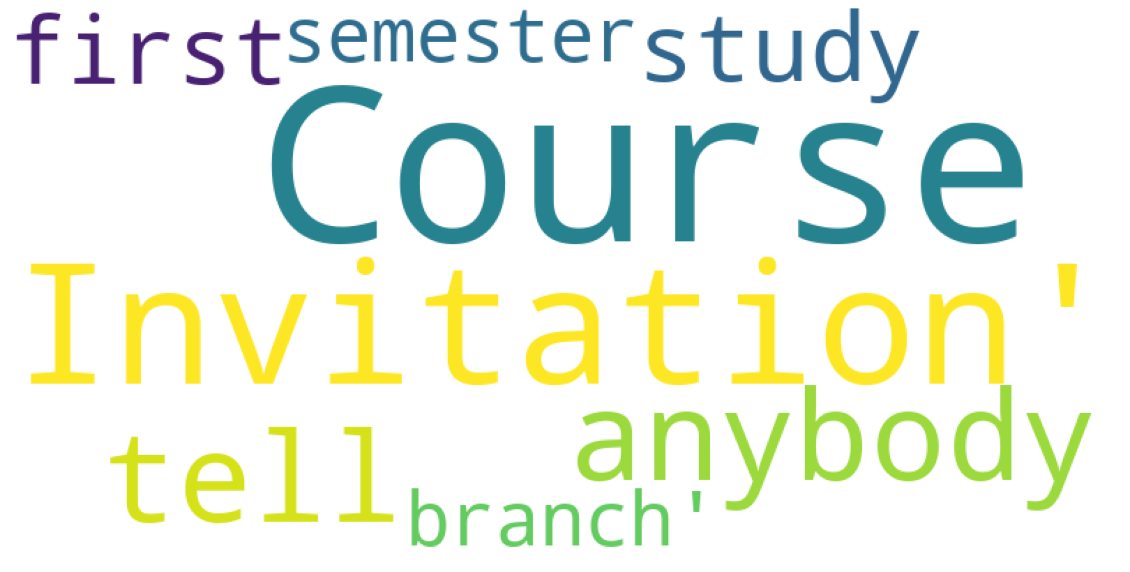

In [9]:
#you can also do the analysis by exporting this csv to excel sheet and visualize through graphs
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = email_df['Subject'].values
stopwords = set(STOPWORDS)
stopwords.update(["nan","n"]) #You can add stopwords if you have any 
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(str(text))
plt.figure(figsize = (20, 20), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.show()